In [1]:
import csv
import random
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline






In [2]:
path = ".../data science/web econ/"

train = pd.read_csv(path + "dataset/train.csv")
validation = pd.read_csv(path+"dataset/validation.csv")
test = pd.read_csv(path + "dataset/test.csv")

# 1.Data Analysis

In [4]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

In [5]:
train.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [5]:
#Basic statistics analysis

df = pd.DataFrame()
df['advertiser'] = np.sort(train.advertiser.unique())
df['impressions'] = train.groupby('advertiser').size().values
df['click'] = train.groupby('advertiser').click.aggregate(np.sum).values
df['cost'] = train.groupby('advertiser').payprice.aggregate(np.sum).values
df['CTR'] = (((df.click / df.impressions) * 100).round(2)).astype(str) + '%'
df['CPM'] = (((df.cost / df.impressions) * 1000).round(2)).astype(str)
df['eCPC'] = ((df.cost / df.click).round(2)).astype(str)

df

,advertiser,impressions,click,cost,CTR,CPM,eCPC
0,1458,540293,451,37231239,0.08%,68909.35,82552.64
1,2259,146778,45,13649026,0.03%,92990.95,303311.69
2,2261,120619,37,10789152,0.03%,89448.2,291598.7
3,2821,231416,144,20625766,0.06%,89128.52,143234.49
4,2997,54487,251,3413227,0.46%,62642.96,13598.51
5,3358,304782,233,28145288,0.08%,92345.64,120795.23
6,3386,498554,358,38341028,0.07%,76904.46,107097.84
7,3427,454031,340,36820111,0.07%,81096.03,108294.44
8,3476,346778,175,27481402,0.05%,79247.82,157036.58


In [6]:
def CTR(variable):
    df = pd.DataFrame()
    df[variable] = np.sort(train[variable].unique())
    df['impressions'] = train.groupby(variable).size().values
    df['click'] = train.groupby(variable).click.aggregate(np.sum).values
    df['CTR'] = (((df.click / df.impressions) * 100).round(2)).astype(str) + '%'
    
    return df.sort_values(["CTR"],ascending = False)

In [7]:
CTR("weekday")

,weekday,impressions,click,CTR
2,2,328051,298,0.09%
3,3,380111,345,0.09%
4,4,361376,311,0.09%
5,5,378028,299,0.08%
1,1,408417,277,0.07%
0,0,465241,293,0.06%
6,6,376514,211,0.06%


In [49]:
CTR("hour").head(5)

,hour,impressions,click,CTR
21,21,112438,118,0.1%
18,18,171748,171,0.1%
17,17,159044,154,0.1%
23,23,126138,113,0.09%
2,2,38384,33,0.09%


In [50]:
CTR("adexchange")

,adexchange,impressions,click,CTR
4,null,54487,251,0.46%
0,1,815403,658,0.08%
2,3,900222,641,0.07%
1,2,840105,436,0.05%
3,4,87521,48,0.05%


In [52]:
CTR("useragent").head(10)


,useragent,impressions,click,CTR
5,android_other,1956,13,0.66%
0,android_chrome,510,3,0.59%
6,android_safari,67728,326,0.48%
9,ios_safari,433,2,0.46%
21,mac_other,8700,31,0.36%
22,mac_safari,41409,140,0.34%
11,linux_firefox,414,1,0.24%
10,linux_chrome,1060,2,0.19%
28,other_other,1788,2,0.11%
34,windows_opera,2434,2,0.08%


In [53]:
CTR("bidprice")

,bidprice,impressions,click,CTR
5,277,200177,305,0.15%
0,227,281102,276,0.1%
7,300,1038847,809,0.08%
2,241,225629,164,0.07%
4,254,130893,97,0.07%
1,238,350714,180,0.05%
6,294,353123,172,0.05%
3,249,117253,31,0.03%


In [55]:
CTR("payprice").head(5)

,payprice,impressions,click,CTR
298,298,313,2,0.64%
297,297,210,1,0.48%
285,285,458,2,0.44%
179,179,1757,7,0.4%
293,293,759,3,0.4%


In [57]:
CTR("region").head(10)

,region,impressions,click,CTR
30,368,9862,14,0.14%
0,0,56868,61,0.11%
33,394,7458,8,0.11%
26,325,942,1,0.11%
18,201,71649,61,0.09%
32,393,14832,14,0.09%
4,15,70365,62,0.09%
27,333,74289,65,0.09%
8,65,56456,52,0.09%
24,298,27417,24,0.09%


In [58]:
CTR("city").head(10)

,city,impressions,click,CTR
333,359,148,2,1.35%
368,398,217,1,0.46%
288,314,789,3,0.38%
247,253,332,1,0.3%
347,373,795,2,0.25%
335,361,400,1,0.25%
117,118,3074,7,0.23%
329,355,885,2,0.23%
132,133,3288,7,0.21%
163,164,3346,7,0.21%


In [59]:
hour= train['hour'].value_counts()
hour = hour.sort_index()

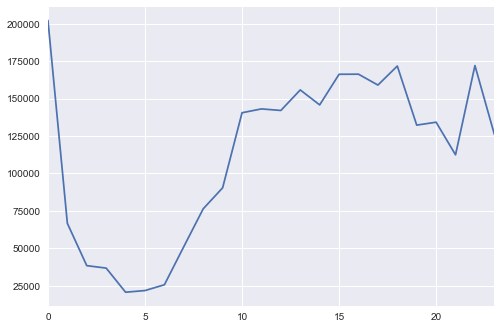

In [60]:
hour.plot()
plt.show()

# 2. Basic bidding strategy

In [29]:
#calculating constant bid stategy

def constant_bidding(bid):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 2500000 # 1/10 budget of 25,000,000

    
    for click, pay_price in validation[['click','payprice']].values:
            if bid > pay_price:
                impression += 1.0
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

bids = pd.DataFrame()
bids['constants'] = [10,25,50,100,150,200,250,300]

imp = []
clk = []
costs = []
for i in bids['constants']:
    [imps, clicks, cost] = constant_bidding(i)
    imp.append(imps)
    clk.append(clicks)
    costs.append(cost)
bids['impression_won'] = imp
bids['clicks'] = clk
bids['cost'] = costs
bids['CTR'] = (bids.clicks/bids.impression_won * 100).round(2).astype(str)
bids['CPM'] = (bids.cost/bids.impression_won * 1000).round(2).astype(str)
bids['CPC'] = (bids.cost/bids.clicks).round(2).astype(str)

In [34]:
constant_bids = bids.sort_values("clicks",ascending = False)
constant_bids

,constants,impression_won,clicks,cost,CTR,CPM,CPC
3,100,50732.0,43,2500072.0,0.08,49279.98,58141.21
2,50,99058.0,40,2404697.0,0.04,24275.65,60117.42
5,200,36988.0,38,2500055.0,0.1,67590.98,65790.92
4,150,42605.0,37,2500093.0,0.09,58680.74,67570.08
7,300,31184.0,36,2500043.0,0.12,80170.7,69445.64
6,250,32972.0,35,2500055.0,0.11,75823.58,71430.14
1,25,56765.0,18,862288.0,0.03,15190.49,47904.89
0,10,13364.0,8,76078.0,0.06,5692.76,9509.75


In [54]:
constant_bids.to_csv(path+"dataset/const_bids_df.csv")

In [48]:
constant_bids.iloc[np.where(constant_bids.clicks == constant_bids.clicks.max())[0]]

,constants,impression_won,clicks,cost,CTR,CPM,CPC
3,100,50732.0,43,2500072.0,0.08,49279.98,58141.21


In [ ]:
b = constant_bids[['clicks','constants']]
a = constant_bids[['constants','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.constants,b.clicks)
ax1.set_xlabel('constant bid')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.constants, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(8, 5)
fig.savefig('constant.PNG', dpi=200)
plt.show()

In [49]:
#calculate random bids from a list of bids

from random import randrange

def random_bid(bid):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 2500000 # 1/10 budget of 25,000,000
    bid = randrange(0,bid)

    
    for click, pay_price in validation[['click','payprice']].values:
            if bid > pay_price:
                impression += 1.0
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost,bid

bids = pd.DataFrame()

bids['random'] = [10,25,50,100,150,200,250,300]

imp = []
clk = []
costs = []
true_random_bid = []
for i in bids['random']:
    [imps, clicks, cost,bid] = random_bid(i)
    imp.append(imps)
    clk.append(clicks)
    costs.append(cost)
    true_random_bid.append(bid)
bids['true_bid']=true_random_bid
bids['impression_won'] = imp
bids['clicks'] = clk
bids['cost'] = costs
bids['CTR'] = (bids.clicks/bids.impression_won * 100).round(2).astype(str)
bids['CPM'] = (bids.cost/bids.impression_won * 1000).round(2).astype(str)
bids['CPC'] = (bids.cost/bids.clicks).round(2).astype(str)

In [50]:
random_bids = bids.sort_values("clicks",ascending= False)
random_bids

,random,true_bid,impression_won,clicks,cost,CTR,CPM,CPC
6,250,144,43620.0,37,2500021.0,0.08,57313.64,67568.14
2,50,35,77000.0,26,1471527.0,0.03,19110.74,56597.19
4,150,19,30733.0,13,319572.0,0.04,10398.33,24582.46
7,300,19,30733.0,13,319572.0,0.04,10398.33,24582.46
3,100,18,28559.0,12,280440.0,0.04,9819.67,23370.0
1,25,8,10850.0,8,54653.0,0.07,5037.14,6831.62
0,10,6,7646.0,1,33986.0,0.01,4444.94,33986.0
5,200,4,882.0,0,1417.0,0.0,1606.58,inf


In [55]:
random_bids.to_csv(path+"dataset/random_bids_df.csv")

In [51]:
random_bids.iloc[np.where(random_bids.clicks == random_bids.clicks.max())[0]]

,random,true_bid,impression_won,clicks,cost,CTR,CPM,CPC
6,250,144,43620.0,37,2500021.0,0.08,57313.64,67568.14


In [ ]:
b = random_bids[['clicks','true_bid']]
a = random_bids[['true_bid','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.true_bid,b.clicks)
ax1.set_xlabel('random bid')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.true_bid, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(8, 5)
fig.savefig('random.PNG', dpi=200)
plt.show()

# 3.Linear Bidding strategy

In [3]:
#drop irrelevant columns
trainx = train.drop(['click','bidid','logtype','userid','IP','domain',
                'url','urlid','slotid','creative','bidprice','payprice','keypage','city','region'], axis=1)
trainy = train.click

valx = validation.drop(['click','bidid','logtype','userid','IP','domain',
                'url','urlid','slotid','creative','bidprice','payprice','keypage','city','region'], axis=1)
valy = validation.click
testx = test.drop(['bidid','logtype','userid','IP','domain',
                'url','urlid','slotid','creative','keypage','city','region'], axis=1)

In [4]:
# split useragent into operation system and browser for encoding later
def split_useragent(data):
    OS = []
    browser = []
    for i in data.useragent: 
        OS.append(i.split("_")[0])
        browser.append(i.split("_")[1])
    data["OS"]=OS
    data["browser"]=browser
    data = data.drop("useragent",axis = 1)
    return data
        

In [5]:
#categorize slot prices into different buckets 
def slot_price(column):
    slotprice = int(column)
    if slotprice > 100:
        return '101+'
    elif slotprice >50:
        return '100-51'
    elif slotprice >10:
        return '50 - 10'
    elif slotprice >0:
        return '10-1'
    else:
        return "0"


def one_hot_encode(variable, data):
    data = pd.concat([data, pd.get_dummies(data[variable], prefix=variable)], axis=1)
    data = data.drop(variable, axis=1)
    return data


def encode(data):
    data = one_hot_encode("hour",data)
    data = one_hot_encode("weekday",data)
    data = one_hot_encode("OS",data)
    data = one_hot_encode("browser",data)
    data = one_hot_encode("adexchange",data)
    data = one_hot_encode("slotwidth",data)
    data = one_hot_encode("slotheight",data)
    data = one_hot_encode("slotvisibility",data)
    data = one_hot_encode("slotformat",data)
    data = one_hot_encode("slotprice",data)
    data = one_hot_encode("advertiser",data)
    return data

def encode_usertag(data):
    temp = pd.DataFrame(data.usertag.str.split(',').tolist())
    df = pd.DataFrame(temp)
    temp_df = pd.get_dummies(df,prefix='usertag')
    tag_df = temp_df.groupby(temp_df.columns, axis=1).sum()
    data = pd.concat([data, tag_df], axis=1)
    data = data.drop('usertag', axis=1)
    return data

In [6]:
trainx = split_useragent(trainx)
valx =split_useragent(valx)
testx = split_useragent(testx)

In [7]:

trainx["slotprice"]= trainx["slotprice"].apply(lambda x: slot_price(x))
valx["slotprice"]= valx["slotprice"].apply(lambda x: slot_price(x))
testx["slotprice"]= testx["slotprice"].apply(lambda x: slot_price(x))

In [8]:
trainx = encode(trainx)
valx = encode(valx)
testx = encode(testx)

In [9]:
trainx = encode_usertag(trainx)
valx = encode_usertag(valx)
testx = encode_usertag(testx)

In [10]:
trainx.to_csv(path+"dataset/train_data.csv")

In [11]:
valx.to_csv(path+"dataset/val_data.csv")

In [12]:
#apply log reg with balanced class weights 
model = linear_model.LogisticRegression(class_weight = "balanced")
pred = model.fit(trainx,trainy)
    


In [17]:
#get the probability of click
prob = pred.predict_proba(valx)

pClick = pd.DataFrame(prob)
pClick[:5]

,0,1
0,0.796426,0.203574
1,0.132973,0.867027
2,0.503463,0.496537
3,0.513766,0.486234
4,0.585161,0.414839


In [18]:
# apply negative downsampling to work out weights in order for probability of click to have the same ratio as training data, technique is called 
#model recalibration  
temp = len(train) / (2 * np.bincount(train.click))
w = temp[0]/temp[1]
print(w)

prob =[]
for p in pClick[1]:
    prob.append( p / (p + ((1-p)/w)))
prob[:5]


0.000754533880574


[0.00019282846510943694,
 0.0048957397214794496,
 0.00074359979157804167,
 0.00071359025873109368,
 0.00053462676671689891]

In [57]:
val_CTR = pd.DataFrame(prob).to_csv(path+"dataset/val_CTR.csv")

In [19]:
#check model accuracy using AUC metric

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve([click for click in validation.click], prob)
print('AUC accuracy:',metrics.auc(fpr, tpr))


AUC accuracy: 0.829087482135


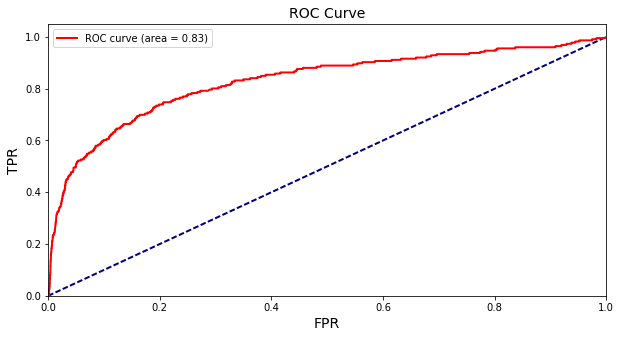

In [62]:
fig1 = plt.subplots(figsize =(10,5))
lw = 2
plt.xlabel("FPR", fontsize=14)
plt.ylabel("TPR", fontsize=14)
plt.title("ROC Curve", fontsize=14)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr,color = 'r', lw=lw, label='ROC curve (area = %0.2f)' %metrics.auc(fpr, tpr))
plt.legend(loc='best')
fig.savefig(path+'roc.PNG', dpi=200)
plt.show()

In [20]:
# calculate linear bidding
averageCTR = (train.click.sum() / train.logtype.sum())
print(averageCTR)# this is the average CTR for training data

base_bids = np.arange(10,300,5) #self defined base bids

bids = []
for i in base_bids:
        bid = i * (np.asarray(prob) / averageCTR)
        bids.append(bid)

segments = [bids[x:x+len(pClick)] for x in range(0, len(bids), len(pClick))] # lump all possible bids according to base bids in segments together
print(bid[:5])

0.0007539649884458758
[   75.44700096  1915.53088004   290.94446278   279.20278733   209.18066303]


In [21]:
#linear bidding function
def linear(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0


    budget = 2500000 # 1/10 budget of 25,000,000

    true_bids = bids >= validation.payprice
    for i in range(0, len(true_bids)):
        if true_bids[i] == True:
            impression += 1.0
            clicks += validation.click[i]
            cost += validation.payprice[i]
        if cost >= budget:
            break
    return impression, clicks, cost

In [22]:
#create a data frame with all information using liner bid function
df = pd.DataFrame()
df['bid'] = base_bids


imp = []
clik = []
ct = []


for bids in segments[0]:
    [imps, clicks, cost] = linear(bids)
    imp.append(imps)
    clik.append(clicks)
    ct.append(cost)
df['impressions'] = imp
df['total_cost'] = ct
df['clicks'] = clik
df['CTR'] = (df.clicks / df.impressions * 100).round(2).astype(str)
df['CPM'] = (df.total_cost / df.impressions * 1000).round(2).astype(str)
df['CPC'] = (df.total_cost / df.clicks).round(2).astype(str)

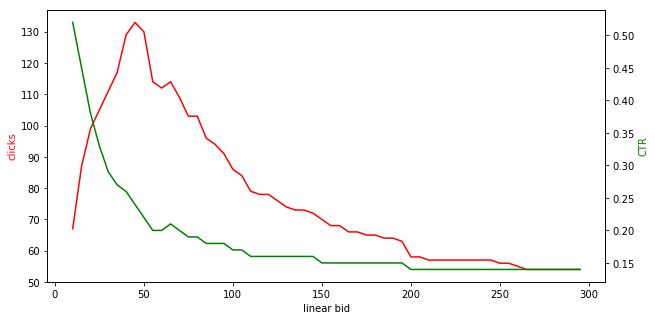

In [26]:
b = df[['clicks','bid']]
a = df[['bid','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.bid,b.clicks,color = 'r')
ax1.set_xlabel('linear bid')
ax1.set_ylabel('clicks', color='r')

ax2 = ax1.twinx()
ax2.plot(a.bid, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig(path+'linear.PNG', dpi=200)
plt.show()

In [28]:
df.sort_values("clicks",ascending = False)[:10]

,bid,impressions,total_cost,clicks,CTR,CPM,CPC
7,45,54789.0,2317593.0,133,0.24,42300.33,17425.51
8,50,58027.0,2500073.0,130,0.22,43084.65,19231.33
6,40,49485.0,2051160.0,129,0.26,41450.14,15900.47
5,35,43775.0,1773814.0,117,0.27,40521.17,15160.8
9,55,57063.0,2500004.0,114,0.2,43811.3,21929.86
11,65,55519.0,2500053.0,114,0.21,45030.58,21930.29
10,60,56332.0,2500031.0,112,0.2,44380.3,22321.71
4,30,37779.0,1494260.0,111,0.29,39552.66,13461.8
12,70,54673.0,2500050.0,109,0.2,45727.32,22936.24
3,25,31835.0,1223545.0,105,0.33,38433.96,11652.81


In [29]:
df.to_csv(path+"dataset/linear_bid.csv")

In [40]:
df.iloc[np.where(df.clicks == df.clicks.max())[0]]

,bid,impressions,total_cost,clicks,CTR,CPM,CPC
7,45,54789.0,2317593.0,133,0.24,42300.33,17425.51


In [68]:
#now work out test CTR 
model = linear_model.LogisticRegression(class_weight = "balanced")
pred = model.fit(trainx,trainy)
testCTR= pred.predict_proba(testx)
testCTR = pd.DataFrame(testCTR)

In [88]:
prob

[0.00019282846510943694,
 0.0048957397214794496,
 0.00074359979157804167,
 0.00071359025873109368,
 0.00053462676671689891,
 0.0014252585173743361,
 0.00073361316390245827,
 0.00038213170657397063,
 0.00012262920271522925,
 0.0012444003651593122,
 0.0020571564808233179,
 0.0010657776896278038,
 0.00017153195831072265,
 0.0010821963766387711,
 0.00018298338495202987,
 0.00027459018883917293,
 0.0010087202587215861,
 0.00031727450146913091,
 0.00016032752617241397,
 0.00018295151121430913,
 0.00015696852817963063,
 0.00018341181180005111,
 0.00012858046730895259,
 4.0740545953377074e-07,
 0.00020091941974249207,
 0.00021742344146856159,
 0.00046787913385417957,
 0.00024624501739340955,
 8.0506345268953542e-05,
 0.0001678214858962663,
 0.00032083036034210059,
 0.00011895298268531334,
 0.0001694749384261257,
 5.9694870024759669e-05,
 0.0016380673509793593,
 0.00020207616921129215,
 0.00031626796524739196,
 0.00013822280596857667,
 0.00025268881183124165,
 8.7529416174886215e-05,
 0.0003676

In [70]:
prob_test = []

for p in testCTR[1]:
    prob_test.append( p / (p + ((1-p)/w)))
prob_test[:5]

[0.0015002742632378332,
 0.00026702669868525393,
 9.1136334669288121e-05,
 0.00030456454149527072,
 9.8012383871767865e-05]

In [71]:
Test_CTR = pd.DataFrame(prob_test).to_csv(path+"dataset/test_CTR.csv")

# None Linear bidding ORTB


In [30]:
# ORTB = sqrt(c/lambda*theta+c^2-c)

lambdas = [5e-10,5e-9,5e-8,5e-7,5e-6,5e-5,5e-4,5e-3,5e-2,5e-1]
c = np.arange(10,100,10)

ortbbids = []
combi = []

for c in c:
    for x in lambdas:
        combi.append((c,x))
        ortbbid = np.sqrt((c / x * np.asarray(prob)) + c**2) - c
        ortbbids.append(ortbbid.tolist())

    
    

    

In [31]:

# function for setting up ORTB bidding strategy
def ORTB_bidding(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 2500000
    
    true_bids = bids >= validation.payprice
    for i in range(0,len(true_bids)):
            if true_bids[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost



In [45]:
#setting up ortb strategy
ortb = pd.DataFrame()
ortb['CandLambda'] = combi

im = []
clks = []
ct = []



for bid in ortbbids:
    [imps, clicks, cost] = ORTB_bidding(bid)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
 
ortb['impression'] = im
ortb['total_cost'] = ct
ortb['clicks'] = clks
ortb['CTR'] = (ortb.clicks/ortb.impression * 100).round(4).astype(str)
ortb['CPM'] = (ortb.total_cost/ortb.impression * 1000).round(2).astype(str)
ortb['CPC'] = (ortb.total_cost/ortb.clicks).round(2).astype(str)



In [41]:
orbt_df = ortb.sort_values("clicks",ascending = False)[:10]
orbt_df

,CandLambda,impression,total_cost,clicks,CTR,CPM,CPC
64,"(70, 5e-06)",66540.0,2493300.0,129,0.1939,37470.69,19327.91
54,"(60, 5e-06)",64619.0,2362776.0,127,0.1965,36564.73,18604.54
74,"(80, 5e-06)",65308.0,2500000.0,124,0.1899,38280.15,20161.29
44,"(50, 5e-06)",62113.0,2194931.0,122,0.1964,35337.71,17991.24
84,"(90, 5e-06)",64245.0,2500054.0,120,0.1868,38914.37,20833.78
34,"(40, 5e-06)",58931.0,1993564.0,118,0.2002,33828.78,16894.61
24,"(30, 5e-06)",54433.0,1725442.0,107,0.1966,31698.45,16125.63
14,"(20, 5e-06)",48152.0,1384922.0,98,0.2035,28761.46,14131.86
4,"(10, 5e-06)",37504.0,899872.0,82,0.2186,23994.03,10974.05
3,"(10, 5e-07)",53141.0,2500015.0,77,0.1449,47044.94,32467.73


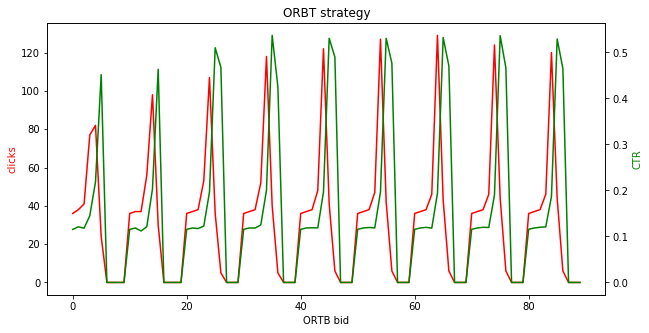

In [74]:
b = ortb[['clicks','CandLambda']]
a = ortb[['CandLambda','CTR']]

fig, ax1 = plt.subplots(figsize=(16,12))
ax1.plot(b.clicks,color = 'r')
ax1.set_xlabel('ORTB bid')
ax1.set_ylabel('clicks', color='r')

ax2 = ax1.twinx()
ax2.plot(a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
plt.title("ORBT strategy")
fig.savefig(path+'ORTB.PNG', dpi=200)
plt.show()

In [87]:
ortb.iloc[np.where(ortb.clicks == ortb.clicks.max())[0]]

,"C,Lambda",impression,total_cost,clicks,CTR,CPM,CPC
74,"(45, 5e-06)",60604.0,2098762.0,120,0.198,34630.75,17489.68


In [97]:
orbt_df.to_csv(path+"dataset/ortb_bidding.csv")

In [91]:
# calculate log bidding
averageCTR = (train.click.sum() / train.logtype.sum())
print(averageCTR)# this is the average CTR for training data

base_bids = np.arange(10,300,5) #self defined base bids

log_bids = []

for i in base_bids:
        log_bid = i * (np.log((np.asarray(prob) / averageCTR))+2)
        log_bids.append(log_bid)

segments_log = [log_bids[x:x+len(pClick)] for x in range(0, len(log_bids), len(pClick))] # lump all possible bids according to base bids in segments together


0.0007539649884458758


In [92]:
def log_bid(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0


    budget = 2500000 # 1/10 budget of 25,000,000

    true_bids = bids >= validation.payprice
    for i in range(0, len(true_bids)):
        if true_bids[i] == True:
            impression += 1.0
            clicks += validation.click[i]
            cost += validation.payprice[i]
        if cost >= budget:
            break
    return impression, clicks, cost

In [93]:

df_log = pd.DataFrame()
df_log['bid'] = base_bids


imp = []
clik = []
ct = []


for bids in segments_log[0]:
    [imps, clicks, cost] = log_bid(bids)
    imp.append(imps)
    clik.append(clicks)
    ct.append(cost)
df_log['impressions'] = imp
df_log['total_cost'] = ct
df_log['clicks'] = clik
df_log['CTR'] = (df_log.clicks / df_log.impressions * 100).round(2).astype(str)
df_log['CPM'] = (df_log.total_cost / df_log.impressions * 1000).round(2).astype(str)
df_log['CPC'] = (df_log.total_cost / df_log.clicks).round(2).astype(str)


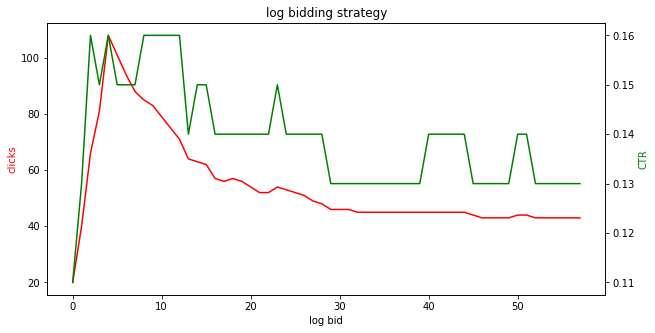

In [94]:
b = df_log[['clicks','bid']]
a = df_log[['bid','CTR']]

fig, ax1 = plt.subplots(figsize=(16,12))
ax1.plot(b.clicks,color = 'r')
ax1.set_xlabel('log bid')
ax1.set_ylabel('clicks', color='r')

ax2 = ax1.twinx()
ax2.plot(a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
plt.title("log bidding strategy")
fig.savefig(path+'log.PNG', dpi=200)
plt.show()

In [ ]:
df_log.sort_values("clicks",ascending = False)[:10]

In [17]:
df_log.sort_values("clicks",ascending = False)[:10].to_csv(path+"dataset/log_bid.csv")

In [89]:
# calculate squared bidding
averageCTR = (train.click.sum() / train.logtype.sum())
print(averageCTR)# this is the average CTR for training data

base_bids = np.arange(10,300,5) #self defined base bids

square_bids = []
for i in base_bids:
        square_bid = i * (((np.asarray(prob) / averageCTR))**2)
        square_bids.append(square_bid)

segments_square = [square_bids[x:x+len(pClick)] for x in range(0, len(square_bids), len(pClick))] # lump all possible bids according to base bids in segments together
print(square_bids[:5])
def square_bids(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0


    budget = 2500000 # 1/10 budget of 25,000,000

    true_bids = bids >= validation.payprice
    for i in range(0, len(true_bids)):
        if true_bids[i] == True:
            impression += 1.0
            clicks += validation.click[i]
            cost += validation.payprice[i]
        if cost >= budget:
            break
    return impression, clicks, cost

df2 = pd.DataFrame()
df2['bid'] = base_bids


imp = []
clik = []
ct = []


for bids in segments_square[0]:
    [imps, clicks, cost] = square_bids(bids)
    imp.append(imps)
    clik.append(clicks)
    ct.append(cost)
df2['impressions'] = imp
df2['total_cost'] = ct
df2['clicks'] = clik
df2['CTR'] = (df2.clicks / df2.impressions * 100).round(2).astype(str)
df2['CPM'] = (df2.total_cost / df2.impressions * 1000).round(2).astype(str)
df2['CPC'] = (df2.total_cost / df2.clicks).round(2).astype(str)


0.0007539649884458758
[array([   0.65409365,  421.63269777,    9.72693828, ...,    6.78481247,
          1.54367288,    0.49546495]), array([   0.98114047,  632.44904666,   14.59040743, ...,   10.1772187 ,
          2.31550932,    0.74319742]), array([   1.30818729,  843.26539555,   19.45387657, ...,   13.56962494,
          3.08734576,    0.9909299 ]), array([    1.63523411,  1054.08174444,    24.31734571, ...,    16.96203117,
           3.8591822 ,     1.23866237]), array([    1.96228094,  1264.89809332,    29.18081485, ...,    20.35443741,
           4.63101864,     1.48639484])]


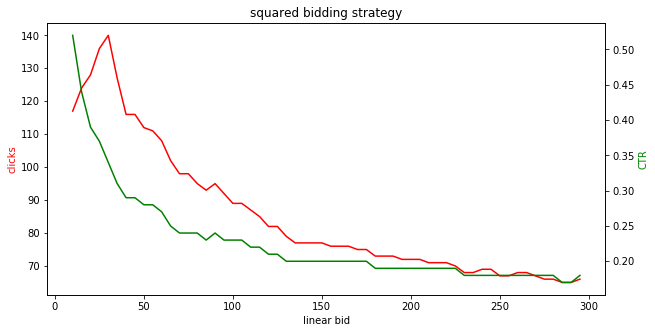

In [95]:
b = df2[['clicks','bid']]
a = df2[['bid','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.bid,b.clicks,color = 'r')
ax1.set_xlabel('linear bid')
ax1.set_ylabel('clicks', color='r')

ax2 = ax1.twinx()
ax2.plot(a.bid, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig(path+'squared.PNG', dpi=200)
plt.title("squared bidding strategy")
plt.show()

In [19]:
df2.sort_values("clicks",ascending =False)[:10]

,bid,impressions,total_cost,clicks,CTR,CPM,CPC
4,30,40636.0,2492616.0,140,0.34,61340.09,17804.4
3,25,36807.0,2255691.0,136,0.37,61284.29,16585.96
2,20,32657.0,2000553.0,128,0.39,61259.55,15629.32
5,35,40639.0,2500051.0,127,0.31,61518.52,19685.44
1,15,27947.0,1707892.0,124,0.44,61111.82,13773.32
0,10,22512.0,1374839.0,117,0.52,61071.38,11750.76
6,40,40548.0,2500049.0,116,0.29,61656.53,21552.15
7,45,40513.0,2500059.0,116,0.29,61710.04,21552.23
8,50,40388.0,2500049.0,112,0.28,61900.79,22321.87
9,55,40299.0,2500061.0,111,0.28,62037.79,22523.07


In [24]:
df2.sort_values("clicks",ascending = False)[:10].to_csv(path+"dataset/square_bid.csv")

In [ ]:
# calculate cubed bidding
averageCTR = (train.click.sum() / train.logtype.sum())
print(averageCTR)# this is the average CTR for training data

base_bids = np.arange(10,300,5) #self defined base bids

cube_bids = []
for i in base_bids:
        cube_bid = i * (((np.asarray(prob) / averageCTR))**3)
        cube_bids.append(cube_bid)

segments_3 = [cube_bids[x:x+len(pClick)] for x in range(0, len(cube_bids), len(pClick))] # lump all possible bids according to base bids in segments together
print(cube_bids[:5])
def cube_bids(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0


    budget = 25000000/10 # 1/8 budget of 25,000,000

    true_bids = bids >= validation.payprice
    for i in range(0, len(true_bids)):
        if true_bids[i] == True:
            impression += 1.0
            clicks += validation.click[i]
            cost += validation.payprice[i]
        if cost >= budget:
            break
    return impression, clicks, cost

df3 = pd.DataFrame()
df3['bid'] = base_bids


imp = []
clik = []
ct = []


for bids in segments_3[0]:
    [imps, clicks, cost] = square_bids(bids)
    imp.append(imps)
    clik.append(clicks)
    ct.append(cost)
df3['impressions'] = imp
df3['total_cost'] = ct
df3['clicks'] = clik
df3['CTR'] = (df3.clicks / df3.impressions * 100).round(2).astype(str)
df3['CPM'] = (df3.total_cost / df3.impressions * 1000).round(2).astype(str)
df3['CPC'] = (df3.total_cost / df3.clicks).round(2).astype(str)


In [79]:
prob[299748]/averageCTR

0.22259041943868416

In [77]:
averageCTR

0.0007539649884458758

In [233]:
df3.sort_values("clicks",ascending =False)[:10]

,bid,impressions,total_cost,clicks,CTR,CPM,CPC
1,15,33606.0,2364437.0,135,0.4,70357.58,17514.35
0,10,29011.0,2054371.0,131,0.45,70813.52,15682.22
2,20,35549.0,2500258.0,130,0.37,70332.72,19232.75
3,25,35655.0,2500009.0,118,0.33,70116.65,21186.52
4,30,35644.0,2500153.0,116,0.33,70142.32,21553.04
5,35,35510.0,2500031.0,111,0.31,70403.58,22522.8
6,40,35518.0,2500119.0,110,0.31,70390.2,22728.35
7,45,35444.0,2500022.0,107,0.3,70534.42,23364.69
8,50,35346.0,2500014.0,105,0.3,70729.76,23809.66
9,55,35378.0,2500043.0,99,0.28,70666.6,25252.96


In [97]:
# calculate root bidding
averageCTR = (train.click.sum() / train.logtype.sum())


base_bids = np.arange(10,300,5) #self defined base bids

root_bids = []
for i in base_bids:
        root_bid = i * ((np.sqrt(np.asarray(prob) / averageCTR)))
        root_bids.append(root_bid)

segments_root = [root_bids[x:x+len(pClick)] for x in range(0, len(root_bids), len(pClick))] # lump all possible bids according to base bids in segments together

def root_bids(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0


    budget = 25000000/10 # 1/8 budget of 25,000,000

    true_bids = bids >= validation.payprice
    for i in range(0, len(true_bids)):
        if true_bids[i] == True:
            impression += 1.0
            clicks += validation.click[i]
            cost += validation.payprice[i]
        if cost >= budget:
            break
    return impression, clicks, cost

df_root = pd.DataFrame()
df_root['bid'] = base_bids


imp = []
clik = []
ct = []


for bids in segments_root[0]:
    [imps, clicks, cost] = root_bids(bids)
    imp.append(imps)
    clik.append(clicks)
    ct.append(cost)
df_root['impressions'] = imp
df_root['total_cost'] = ct
df_root['clicks'] = clik
df_root['CTR'] = (df_root.clicks / df_root.impressions * 100).round(2).astype(str)
df_root['CPM'] = (df_root.total_cost / df_root.impressions * 1000).round(2).astype(str)
df_root['CPC'] = (df_root.total_cost / df_root.clicks).round(2).astype(str)


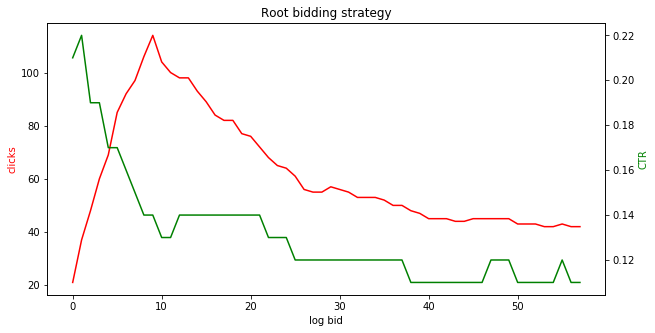

In [98]:
b = df_root[['clicks','bid']]
a = df_root[['bid','CTR']]

fig, ax1 = plt.subplots(figsize=(16,12))
ax1.plot(b.clicks,color = 'r')
ax1.set_xlabel('log bid')
ax1.set_ylabel('clicks', color='r')

ax2 = ax1.twinx()
ax2.plot(a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
plt.title("Root bidding strategy")
fig.savefig(path+'root.PNG', dpi=200)
plt.show()

In [26]:
df_root.sort_values("clicks",ascending = False)[:10].to_csv(path+"dataset/root_bid.csv")

In [99]:
# calculate exponential bidding
averageCTR = (train.click.sum() / train.logtype.sum())


base_bids = np.arange(10,300,5) #self defined base bids

exp_bids = []
for i in base_bids:
        exp_bid = i * ((np.exp(np.asarray(prob) / averageCTR)))
        exp_bids.append(exp_bid)

segments_exp = [exp_bids[x:x+len(pClick)] for x in range(0, len(exp_bids), len(pClick))] # lump all possible bids according to base bids in segments together

def exp_bids(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0


    budget = 25000000/10 # 1/8 budget of 25,000,000

    true_bids = bids >= validation.payprice
    for i in range(0, len(true_bids)):
        if true_bids[i] == True:
            impression += 1.0
            clicks += validation.click[i]
            cost += validation.payprice[i]
        if cost >= budget:
            break
    return impression, clicks, cost

df_exp = pd.DataFrame()
df_exp['bid'] = base_bids


imp = []
clik = []
ct = []


for bids in segments_exp[0]:
    [imps, clicks, cost] = exp_bids(bids)
    imp.append(imps)
    clik.append(clicks)
    ct.append(cost)
df_exp['impressions'] = imp
df_exp['total_cost'] = ct
df_exp['clicks'] = clik
df_exp['CTR'] = (df_exp.clicks / df_exp.impressions * 100).round(2).astype(str)
df_exp['CPM'] = (df_exp.total_cost / df_exp.impressions * 1000).round(2).astype(str)
df_exp['CPC'] = (df_exp.total_cost / df_exp.clicks).round(2).astype(str)
df_exp

C:\Users\sluk6\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: overflow encountered in exp
C:\Users\sluk6\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: overflow encountered in multiply


,bid,impressions,total_cost,clicks,CTR,CPM,CPC
0,10,48990.0,2170752.0,131,0.27,44310.1,16570.63
1,15,60369.0,2500000.0,115,0.19,41411.98,21739.13
2,20,62168.0,2500072.0,104,0.17,40214.77,24039.15
3,25,59970.0,2500000.0,94,0.16,41687.51,26595.74
4,30,57606.0,2500032.0,86,0.15,43398.81,29070.14
5,35,55045.0,2500021.0,80,0.15,45417.77,31250.26
6,40,52642.0,2500045.0,71,0.13,47491.45,35211.9
7,45,50507.0,2500209.0,65,0.13,49502.23,38464.75
8,50,48623.0,2500007.0,56,0.12,51416.14,44642.98
9,55,46961.0,2500051.0,55,0.12,53236.75,45455.47


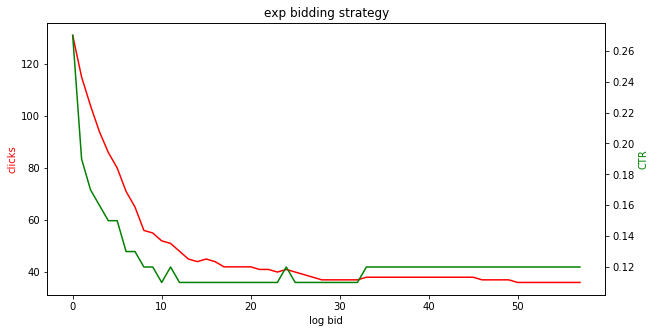

In [100]:
b = df_exp[['clicks','bid']]
a = df_exp[['bid','CTR']]

fig, ax1 = plt.subplots(figsize=(16,12))
ax1.plot(b.clicks,color = 'r')
ax1.set_xlabel('log bid')
ax1.set_ylabel('clicks', color='r')

ax2 = ax1.twinx()
ax2.plot(a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
plt.title("exp bidding strategy")
fig.savefig(path+'exp.PNG', dpi=200)
plt.show()

In [22]:
df_exp.sort_values("clicks",ascending = False)[:10]

,bid,impressions,total_cost,clicks,CTR,CPM,CPC
0,10,48990.0,2170752.0,131,0.27,44310.1,16570.63
1,15,60369.0,2500000.0,115,0.19,41411.98,21739.13
2,20,62168.0,2500072.0,104,0.17,40214.77,24039.15
3,25,59970.0,2500000.0,94,0.16,41687.51,26595.74
4,30,57606.0,2500032.0,86,0.15,43398.81,29070.14
5,35,55045.0,2500021.0,80,0.15,45417.77,31250.26
6,40,52642.0,2500045.0,71,0.13,47491.45,35211.9
7,45,50507.0,2500209.0,65,0.13,49502.23,38464.75
8,50,48623.0,2500007.0,56,0.12,51416.14,44642.98
9,55,46961.0,2500051.0,55,0.12,53236.75,45455.47


In [27]:
df_exp.sort_values("clicks",ascending = False)[:10].to_csv(path+"dataset/exp_bid.csv")

In [170]:

#get the best metric with the most clicks to use to calculate test data bidprice
best_clickrate = pd.DataFrame(df.loc[df['clicks'] == df.clicks.max()])
bestbid = best_clickrate["bid"].values
bestbid = bestbid[0]

bestbidprice = bestbid * (np.asarray(prob) / averageCTR)


In [78]:
from sklearn import metrics, cross_validation


C:\Users\sluk6\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [84]:
#check using cross validation 
#predicted = cross_validation.cross_val_predict(linear_model.LogisticRegression(class_weight ="balanced"), trainx, trainy, cv=5)
#print (metrics.accuracy_score(trainy, predicted))

0.815306749581


In [172]:
bestbidprice = pd.DataFrame(bestbidprice)
bidid = pd.DataFrame(test.bidid)

In [173]:
df_bestbidprice = pd.concat([bidid,bestbidprice],axis=1)

In [191]:
df_bestbidprice.to_csv("test_bestbid_prel.csv")